In [24]:
import sys
sys.path.insert(0, "../")

import math
import matgraph as mg
import torch
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

%load_ext line_profiler

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
fsm = mg.CompiledFSA.from_file(
    "/home/ubuntu/Exps/lfmmi2/sup_s03_lm/graphs/denominator.fsa",
)
seqlengths = torch.tensor([100]).repeat(32).numpy()
X = 100*torch.randn(len(seqlengths), seqlengths[1], 96).cuda()

In [ ]:
X.shape

torch.Size([32, 100, 96])

In [18]:
bfsm = mg.BatchCompiledFSA.from_list([fsm for _ in range(len(seqlengths))])
bfsm = bfsm.cuda()

In [20]:
Z, ttl = mg.pdfposteriors(bfsm, X, seqlengths)

In [30]:
%prun? 

UsageError: Line magic function `%prun?` not found.


In [28]:
%prun mg.pdfposteriors(bfsm, X, seqlengths)

         74 function calls in 0.162 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
       22    0.162    0.007    0.162    0.007 {method '_jl_callmethod' of 'juliacall.ValueBase' objects}
       10    0.000    0.000    0.162    0.016 any.jl:168:29(__call__)
        1    0.000    0.000    0.162    0.162 fsa.py:79(pdfposteriors)
       12    0.000    0.000    0.000    0.000 any.jl:168:14(__getattr__)
        1    0.000    0.000    0.162    0.162 {built-in method builtins.exec}
        2    0.000    0.000    0.000    0.000 {built-in method torch._C._from_dlpack}
        2    0.000    0.000    0.000    0.000 dlpack.py:47(from_dlpack)
       12    0.000    0.000    0.000    0.000 {method 'startswith' of 'str' objects}
        2    0.000    0.000    0.000    0.000 __init__.py:148(is_initialized)
        2    0.000    0.000    0.000    0.000 __init__.py:190(_lazy_init)
        2    0.000    0.000    0.000    0.000 __init__.py:177

In [33]:
%timeit mg.pdfposteriors(bfsm, X, seqlengths);

448 ms ± 11.4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


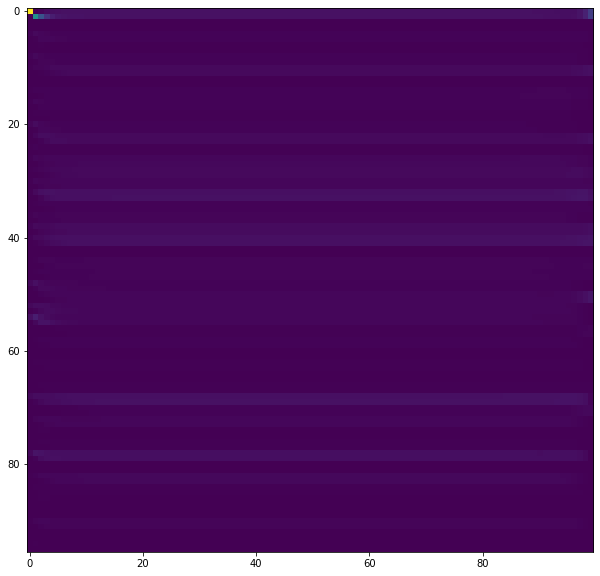

In [15]:
%matplotlib inline

plt.rcParams["figure.figsize"] = (20, 10)
plt.imshow(Z.cpu().numpy()[1].T, cmap='viridis', interpolation='nearest')
plt.show()